In [1]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
import pandas as pd
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv('data/modeldf.csv')

In [13]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

NameError: name 'test_set_pred' is not defined

In [10]:
df.Action_genre.sum()

2101

In [14]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
df.head(1)

,num_reviews,orig_price,been_sale,rating_val,num_tags,num_genres,year_released,languages_filled,BANDAI NAMCO Entertainment,Bethesda Softworks,...,Open_genre,FirstPerson_genre,Survival_genre,Funny_genre,Coop_genre,Fantasy_genre,Early_genre,Access_genre,Platformer_genre,Local_genre
0,111078,39.99,1,8.0,20.0,2.0,2020,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X, y = df.iloc[:,1:], df.iloc[:,0]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5519 entries, 0 to 5518
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_reviews                 5519 non-null   int64  
 1   orig_price                  5519 non-null   float64
 2   been_sale                   5519 non-null   int64  
 3   rating_val                  5519 non-null   float64
 4   num_tags                    5519 non-null   float64
 5   num_genres                  5519 non-null   float64
 6   year_released               5519 non-null   int64  
 7   languages_filled            5519 non-null   float64
 8   BANDAI NAMCO Entertainment  5519 non-null   int64  
 9   Bethesda Softworks          5519 non-null   int64  
 10  Devolver Digital            5519 non-null   int64  
 11  Disney                      5519 non-null   int64  
 12  Electronic Arts             5519 non-null   int64  
 13  Kagura Games                5519 

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X,y)

LinearRegression()

In [9]:
lr.score(X,y)

0.48746337136978213

In [38]:
#created test/trian/val split fo the data
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=7)

In [69]:
X_train.shape

(2649, 81)

In [39]:
X_test.shape

(883, 81)

In [44]:
X.shape

(3532, 81)

In [42]:
X_val.shape

(883, 81)

In [70]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.08281277548208554

In [71]:
#adding polynomial features, for the interactions, and to see the impact on the score
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.3870690392683148

In [51]:
#noiced year released had a log relationship in previous work,
#adding log year column to see if it increases.

In [72]:
lr_poly.score(X_val_poly,y_val)

-5572934221.314723

In [64]:
scaler = StandardScaler()

In [65]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)



In [73]:
# # Don't forget to standard scale your data for regularized regression
# scaler = StandardScaler()
# X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# # Apply the same scaler to val set
# X_val_poly_scaled = scaler.transform(X_val_poly)

# # Fit a LASSO model using polynomial features
# lasso = LassoCV()
# lasso.fit(X_train_poly_scaled,y_train)
# lasso.score(X_train_poly_scaled,y_train)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3406716131.2998047, tolerance: 520719158.24291235
  model = cd_fast.enet_coordinate_descent(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3567127008.8793945, tolerance: 520719158.24291235
  model = cd_fast.enet_coordinate_descent(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4666989015.991211, tolerance: 520719158.24291235
  model = cd_fast.enet_coordinate_descent(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

KeyboardInterrupt: 

In [116]:
lasso_model = Lasso(alpha = 100) 
lasso_model.fit(X_train, y_train)

Lasso(alpha=100)

In [117]:
selected_columns = list(df.iloc[:,1:])

In [118]:
list(zip(selected_columns, lasso_model.coef_))

[('orig_price', 319.9875476346351),
 ('been_sale', -0.0),
 ('rating_val', 335.60240412911196),
 ('num_tags', 797.4076087689514),
 ('num_genres', -2.7016347781103183),
 ('year_released', -1083.0163729697506),
 ('languages_filled', 2300.900365987926),
 ('BANDAI NAMCO Entertainment', -0.0),
 ('Bethesda Softworks', 1270.1324481792622),
 ('Devolver Digital', 0.0),
 ('Disney', -0.0),
 ('Electronic Arts', -0.0),
 ('Kagura Games', -0.0),
 ('Nightdive Studios', -0.0),
 ('Paradox Interactive', 0.0),
 ('SEGA', -0.0),
 ('Square Enix', -0.0),
 ('THQ Nordic', -0.0),
 ('Ubisoft', -0.0),
 ('Xbox Game Studios', 0.0),
 ('other', 1907.9666349014242),
 ('Singleplayer_tag', 0.0),
 ('Indie_tag', 0.0),
 ('Action_tag', 0.0),
 ('Adventure_tag', 0.0),
 ('Multiplayer_tag', 0.0),
 ('Strategy_tag', 0.0),
 ('RPG_tag', 0.0),
 ('Casual_tag', 0.0),
 ('Simulation_tag', 0.0),
 ('Atmospheric_tag', 0.0),
 ('Horror_tag', 0.0),
 ('2D_tag', 0.0),
 ('Soundtrack_tag', 0.0),
 ('Great_tag', 0.0),
 ('Story_tag', 0.0),
 ('Rich_tag

In [119]:
lr_model_ridge = Ridge(alpha = 100)
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

[('orig_price', 329.5530320477175),
 ('been_sale', -619.237267283237),
 ('rating_val', 256.27311219929624),
 ('num_tags', 794.3184433141257),
 ('num_genres', 438.37825181469367),
 ('year_released', -1130.0145673289371),
 ('languages_filled', 2323.7518873550625),
 ('BANDAI NAMCO Entertainment', -1364.1092959691857),
 ('Bethesda Softworks', 2555.6385748783255),
 ('Devolver Digital', 997.3662272364852),
 ('Disney', -952.6307631390268),
 ('Electronic Arts', -1096.4676241406926),
 ('Kagura Games', -299.54103917261125),
 ('Nightdive Studios', -309.61410224575616),
 ('Paradox Interactive', 1873.463957817049),
 ('SEGA', -788.7560496890619),
 ('Square Enix', -1222.5609828745012),
 ('THQ Nordic', -1607.6433610417064),
 ('Ubisoft', -1496.8929084278593),
 ('Xbox Game Studios', 833.4481662742255),
 ('other', 2106.222290849239),
 ('Singleplayer_tag', 0.0),
 ('Indie_tag', 0.0),
 ('Action_tag', 0.0),
 ('Adventure_tag', 0.0),
 ('Multiplayer_tag', 0.0),
 ('Strategy_tag', 0.0),
 ('RPG_tag', 0.0),
 ('Casu

In [120]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

,orig_price,been_sale,rating_val,num_tags,num_genres,year_released,languages_filled,BANDAI NAMCO Entertainment,Bethesda Softworks,Devolver Digital,...,Open_genre,FirstPerson_genre,Survival_genre,Funny_genre,Coop_genre,Fantasy_genre,Early_genre,Access_genre,Platformer_genre,Local_genre
0,39.99,1,8.0,20.0,2.0,2020,13.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39.99,0,9.0,20.0,3.0,2021,12.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19.99,0,9.0,20.0,6.0,2021,12.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,49.99,1,7.0,20.0,3.0,2020,20.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.99,0,9.0,20.0,0.0,2020,25.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5514,4.99,1,5.0,5.0,2.0,2019,10.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5515,4.99,0,8.0,16.0,5.0,2019,10.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5516,0.99,0,5.0,3.0,3.0,2018,10.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5517,0.99,0,5.0,2.0,2.0,2018,10.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

In [95]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

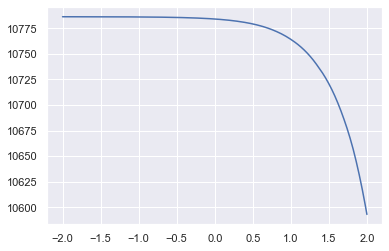

In [121]:
#plot the curve of validation error as alpha changes

plt.plot(np.log10(alphalist), err_vec_val)

In [122]:
## This is the minimum error achieved on the validation set 
## across the different alpha values we tried

np.min(err_vec_val)

10592.94606154836

In [123]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]

100.0

In [124]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [125]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [126]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [127]:
lasso_model.alpha_

100.0

In [128]:
list(zip(X_train.columns, lasso_model.coef_))

[('orig_price', 4023.861405248766),
 ('been_sale', -290.42170773673683),
 ('rating_val', 699.7324947475248),
 ('num_tags', 4793.755372488246),
 ('num_genres', 0.0),
 ('year_released', -3473.0458848682997),
 ('languages_filled', 6724.944309134146),
 ('BANDAI NAMCO Entertainment', -774.8231135935904),
 ('Bethesda Softworks', 1010.0328039938552),
 ('Devolver Digital', 297.7402707251717),
 ('Disney', -576.6962798739536),
 ('Electronic Arts', -578.0312769914183),
 ('Kagura Games', -179.16318825029904),
 ('Nightdive Studios', -242.07395354529697),
 ('Paradox Interactive', 759.2700199485986),
 ('SEGA', -487.7257302877862),
 ('Square Enix', -685.1406895023088),
 ('THQ Nordic', -840.3422726283607),
 ('Ubisoft', -831.05304326482),
 ('Xbox Game Studios', 229.22680947826834),
 ('other', 0.0),
 ('Singleplayer_tag', 0.0),
 ('Indie_tag', 0.0),
 ('Action_tag', 0.0),
 ('Adventure_tag', 0.0),
 ('Multiplayer_tag', 0.0),
 ('Strategy_tag', 0.0),
 ('RPG_tag', 0.0),
 ('Casual_tag', 0.0),
 ('Simulation_tag', 

In [129]:
test_set_pred = lasso_model.predict(X_te)

In [130]:
mae(y_test, test_set_pred)

12171.431649259755

In [131]:
r2_score(y_test, test_set_pred)

0.03946266273429

In [115]:
X.shape

(3532, 81)

In [135]:
residuals = y_test - test_set_pred

In [136]:
residuals

5138     3013.024866
1       -8056.464521
624     -2362.578347
1921    -2220.248281
5205     7121.382425
            ...     
1132   -11962.373739
141     31927.484226
3376     6158.502204
4244   -26286.326445
2757     1268.749536
Name: num_reviews, Length: 883, dtype: float64

<AxesSubplot:xlabel='num_reviews'>

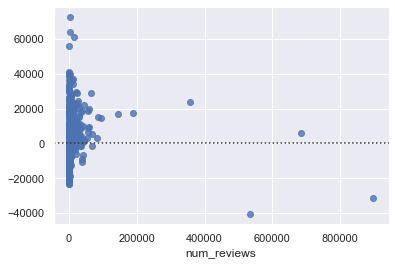

In [137]:
sns.residplot(x=y_test, y=test_set_pred)

In [10]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=7)

In [11]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.6314130761771726

In [12]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)




In [23]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)
#y_train_poly = poly.transform(y_train)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.6314130761771726

In [18]:
lasso_model = Lasso(alpha = 100) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train_poly, y_train_poly)

NameError: name 'y_train_poly' is not defined

In [19]:
lr_poly.score(X_val_poly, y_val)

0.07435560603680347

In [25]:
scaler = StandardScaler()
#X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
#X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_poly,y_train)
lasso.score(X_train_poly,y_train)

0.07617142187529358

<AxesSubplot:>

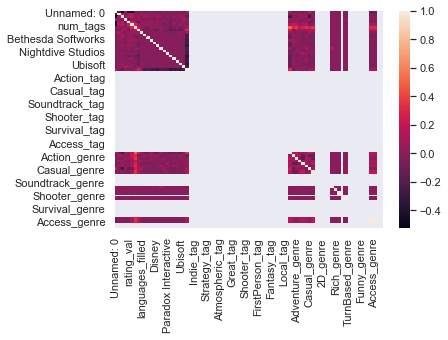

In [27]:
sns.heatmap(df.corr())

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5519 entries, 0 to 5518
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5519 non-null   int64  
 1   num_reviews                 5519 non-null   int64  
 2   orig_price                  5519 non-null   float64
 3   been_sale                   5519 non-null   int64  
 4   rating_val                  5519 non-null   float64
 5   num_tags                    5519 non-null   float64
 6   num_genres                  5519 non-null   float64
 7   year_released               5519 non-null   int64  
 8   languages_filled            5519 non-null   float64
 9   BANDAI NAMCO Entertainment  5519 non-null   int64  
 10  Bethesda Softworks          5519 non-null   int64  
 11  Devolver Digital            5519 non-null   int64  
 12  Disney                      5519 non-null   int64  
 13  Electronic Arts             5519 

In [29]:
sns.residplot(x=y_test, y=test_set_pred)

NameError: name 'test_set_pred' is not defined

In [32]:
test_set_pred = lasso_model.predict(X_train)

NotFittedError: This Lasso instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.